In [8]:
from exercise03 import QNet, MC_func_approx, evaluate_greedy_policy, gym_video
import gymnasium as gym
from tqdm.notebook import trange
import torch

In [21]:
epsilon = 0.7213226283289884
nr_episodes = 10_000
max_t = 1000  # 400
gamma = 0.9999
replay_buffer_size = 10000
hidden_size = 5
n_layers = 1

Training: 100%|██████████| 10000/10000 [01:05<00:00, 153.41episodes/s, episode return=44.38, episode length=44.52]


Mean episode reward from MC_func_approx on cartpole:  225.861


/Users/jonas/mambaforge/envs/MMDS/lib/python3.10/site-packages/gymnasium/wrappers/record_video.py:79: UserWarning: WARN: Overwriting existing videos at /Users/jonas/sciebo/MMDS/RL/exercise03/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


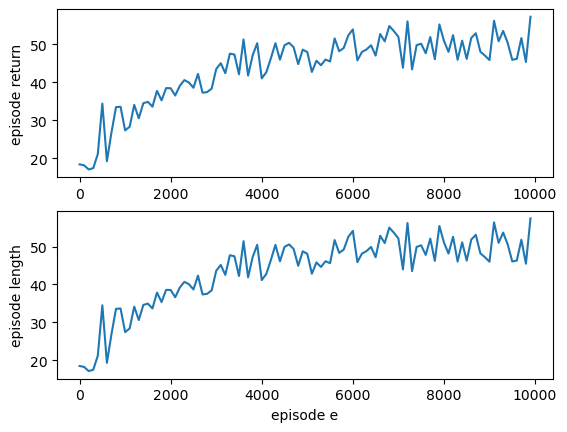

In [22]:
cartpole_env = gym.make("CartPole-v1", render_mode="rgb_array")
cartpole_observation_space_size = cartpole_env.observation_space.shape[0]
cartpole_nr_actions = cartpole_env.action_space.n
cartpole_qnet = QNet(
    cartpole_observation_space_size, cartpole_nr_actions, hidden_size, n_layers
)
cartpole_optimizer = torch.optim.SGD(cartpole_qnet.parameters(), lr=1e-3)

MC_cartpolt_policy = MC_func_approx(
    cartpole_env, cartpole_qnet, cartpole_optimizer, epsilon, nr_episodes, max_t, gamma
)
print(
    "Mean episode reward from MC_func_approx on cartpole: ",
    evaluate_greedy_policy(cartpole_env, MC_cartpolt_policy),
)
gym_video(cartpole_qnet, cartpole_env, "name", 10_00_000, "videos")

In [ ]:
cartpole_qnet.load_state_dict(torch.load('./models/MC_func_approx_model.pth'))
MC_cartpolt_policy = cartpole_qnet.act_greedy
print(
    "Mean episode reward from MC_func_approx on cartpole: ",
    evaluate_greedy_policy(cartpole_env, MC_cartpolt_policy),
)
gym_video(cartpole_qnet, cartpole_env, "current", 10_00_000, "videos")

Mean episode reward from MC_func_approx on cartpole:  599.611


/Users/jonas/mambaforge/envs/MMDS/lib/python3.10/site-packages/gymnasium/wrappers/record_video.py:79: UserWarning: WARN: Overwriting existing videos at /Users/jonas/sciebo/MMDS/RL/exercise03/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


In [18]:
from IPython.display import HTML

HTML("""
    <video width="420" height="320" controls>
        <source src="videos/current-episode-0.mp4" type="video/mp4">
    </video>
""")

In [6]:
mountaincar_env = gym.make("MountainCar-v0", render_mode="rgb_array")
mountaincar_observation_space_size = mountaincar_env.observation_space.shape[0]
mountaincar_nr_actions = mountaincar_env.action_space.n
mountaincar_qnet = QNet(mountaincar_observation_space_size, mountaincar_nr_actions, 8)
mountaincar_optimizer = torch.optim.SGD(mountaincar_qnet.parameters(), lr=1e-3)

In [12]:
import gymnasium as gym
import numpy as np
from stable_baselines3 import DQN, A2C
from bokeh.plotting import figure, show
from bokeh.io import push_notebook, output_notebook
from IPython.display import display

# create a gym environment and a PPO agent to train in it
env = gym.make('CartPole-v1')
model = A2C('CnnPolicy', env, verbose=0)

# define a function to update the plot with the latest training statistics
def update_plot(ep_rewards, length, mean_length):
    # create a new figure with the updated data
    plot = figure(title='Training Progress', x_axis_label='Episode', y_axis_label='Reward')
    plot.line(range(len(ep_rewards)), ep_rewards)
    plot.line(range(len(length)), length, line_color='red')
    plot.line(range(len(mean_length)), mean_length, line_color='green')
    # display the updated plot
    push_notebook(handle=plot_handle)

# initialize the plot with empty data
output_notebook()
plot = figure(title='Training Progress', x_axis_label='Episode', y_axis_label='Reward')
plot_handle = show(plot, notebook_handle=True)

# train the model for 100 episodes, updating the plot after each one
ep_rewards = []
length = []
mean_length = []
for i in range(100):
    # run one episode of the environment and update the model
    obs = env.reset()
    done = False
    ep_reward = 0
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info, _ = env.step(action)
        ep_reward += reward
        model.learn(1)  # take one gradient step after each action
    ep_rewards.append(ep_reward)
    length.append(info['length'])
    mean_length.append(np.mean(length))
    update_plot(ep_rewards, length, mean_length)

AssertionError: The algorithm only supports (<class 'gym.spaces.box.Box'>, <class 'gym.spaces.discrete.Discrete'>, <class 'gym.spaces.multi_discrete.MultiDiscrete'>, <class 'gym.spaces.multi_binary.MultiBinary'>) as action spaces but Discrete(2) was provided